This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, rad_overlap, mu_me
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Crossed fields, $n=20-21$

In [2]:
# construct matrix
n_min = 20
n_max = 21
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 3364


In [3]:
# calculate Stark map
Bfield=0.1
Efield_vec=[1.0,0.0,0.0]
stark_method='6j'
Efield = np.linspace(4.5*10**2, 6.0*10**2, 31) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     stark_method=stark_method,
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     stark_method=stark_method,
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

Using field orientation: perpendicular
Loaded zeeman matrix from, 
	 ./saved_matrices/zeeman_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None.npz
Saved zeeman matrix as, 
	 ./saved_matrices/zeeman_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None
H_Z sum:  -0.000763743915728
Loaded stark matrix from, 
	 ./saved_matrices/stark_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None_perpendicular.npz


diagonalise Hamiltonian:   0%|          | 0/31 [00:00<?, ?it/s]

Saved stark matrix as, 
	 ./saved_matrices/stark_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None_perpendicular
mat_s sum:  -98539.8580551


diagonalise Hamiltonian: 100%|██████████| 31/31 [01:57<00:00,  3.73s/it]


Using field orientation: perpendicular
Using cached Zeeman matrix


calculate singlet-triplet coupling terms:   0%|          | 0/3364 [00:00<?, ?it/s]

Saved zeeman matrix as, 
	 ./saved_matrices/zeeman_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None
H_Z sum:  -0.000763743915728


calculate singlet-triplet coupling terms: 100%|██████████| 3364/3364 [00:17<00:00, 197.14it/s]


Saved singlet-triplet matrix as, 
	 ./saved_matrices/singlet-triplet_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None
H_spin sum:  -7.77409528895e-06
Using cached Stark matrix


diagonalise Hamiltonian:   0%|          | 0/31 [00:00<?, ?it/s]

Saved stark matrix as, 
	 ./saved_matrices/stark_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None_perpendicular
mat_s sum:  -98539.8580551


diagonalise Hamiltonian: 100%|██████████| 31/31 [01:51<00:00,  3.60s/it]


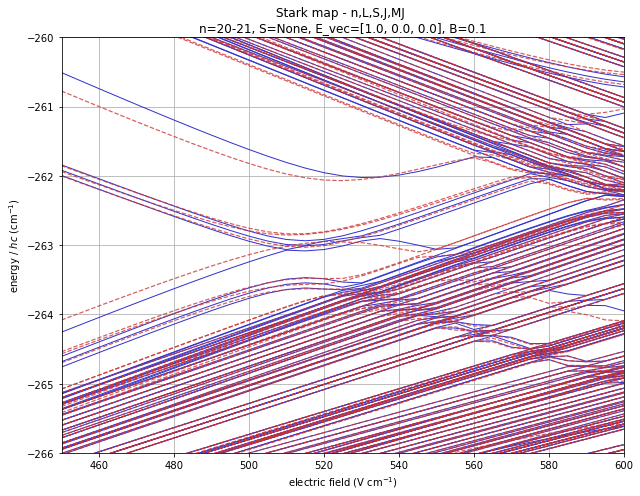

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(450, 600)
ax.set_ylim(-266, -260)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()

# Crossed fields, $n=5-6$

In [2]:
n_min = 5
n_max = 6
S = None
# construct matrix
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 244
Number of basis states: 244


In [3]:
# calculate Stark map
Bfield=10.0
Efield_vec=[1.0,0.0,0.0]
stark_method='6j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 301)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     Efield_vec=Efield_vec)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     Efield_vec=Efield_vec,
                     singlet_triplet_coupling=True)

calculate Zeeman terms:   0%|          | 0/244 [00:00<?, ?it/s]

Field orientation: perpendicular


calculate Stark terms:   0%|          | 0/244 [00:00<?, ?it/s]

H_Z sum:  -0.00460364391642


diagonalise Hamiltonian:   1%|          | 3/301 [00:00<00:10, 29.47it/s]

mat_s sum:  -1523.97338838


calculate Zeeman terms:   7%|▋         | 17/244 [00:00<00:01, 163.80it/s]

Field orientation: perpendicular


calculate singlet-triplet coupling terms:  24%|██▍       | 58/244 [00:00<00:00, 577.69it/s]

H_Z sum:  -0.00460364391642


calculate Stark terms:   1%|          | 2/244 [00:00<00:16, 14.94it/s]

H_spin sum:  -0.000895904772624


diagonalise Hamiltonian:   8%|▊         | 23/301 [00:00<00:01, 223.13it/s]

mat_s sum:  -1523.97338838


diagonalise Hamiltonian: 100%|██████████| 301/301 [00:01<00:00, 246.97it/s]


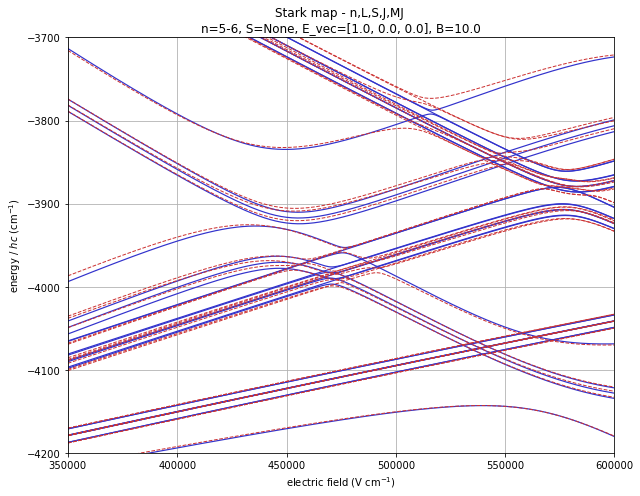

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
indexes = range(mat1.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1., alpha=1, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(3.5*10**5, 6.0*10**5)
ax.set_ylim(-4200, -3700)
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))

# output
plt.grid()
plt.tight_layout()

# Testing 

### Comapre Wigner-3J and Wigner-6J

In [5]:
n_min = 5
n_max = 6
S = None
# construct matrix
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ=None)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 244
Number of basis states: 244


In [6]:
# calculate Stark map
Bfield=0.0
Efield_vec=[1.0,0.0,0.0]
stark_method='3j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method)
sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     singlet_triplet_coupling=True)

# calculate Stark map
Bfield=0.0
Efield_vec=[1.0,0.0,0.0]
stark_method='6j'
zeeman_method='hsfs'
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
sm2 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method)
sm3 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec,
                     stark_method=stark_method,
                     zeeman_method=zeeman_method,
                     singlet_triplet_coupling=True)

calculate Stark terms:   1%|          | 3/244 [00:00<00:08, 28.88it/s]

Using field orientation: perpendicular


diagonalise Hamiltonian:   3%|▎         | 16/501 [00:00<00:03, 155.10it/s]

mat_s sum:  -160.871768553


calculate singlet-triplet coupling terms:  25%|██▍       | 60/244 [00:00<00:00, 591.62it/s]

Using field orientation: perpendicular


calculate Stark terms:   1%|          | 3/244 [00:00<00:08, 28.32it/s]

H_spin sum:  -0.00179180954525


diagonalise Hamiltonian:   4%|▍         | 19/501 [00:00<00:02, 185.78it/s]

mat_s sum:  -160.871768553


calculate Stark terms:   1%|          | 3/244 [00:00<00:08, 28.89it/s]

Using field orientation: perpendicular


diagonalise Hamiltonian:   5%|▍         | 23/501 [00:00<00:02, 227.70it/s]

mat_s sum:  -1523.97338838


calculate Stark terms:   0%|          | 0/244 [00:00<?, ?it/s]

Using field orientation: perpendicular
H_spin sum:  -0.00179180954525


diagonalise Hamiltonian:   5%|▌         | 27/501 [00:00<00:01, 268.27it/s]

mat_s sum:  -1523.97338838


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:02<00:00, 237.91it/s]


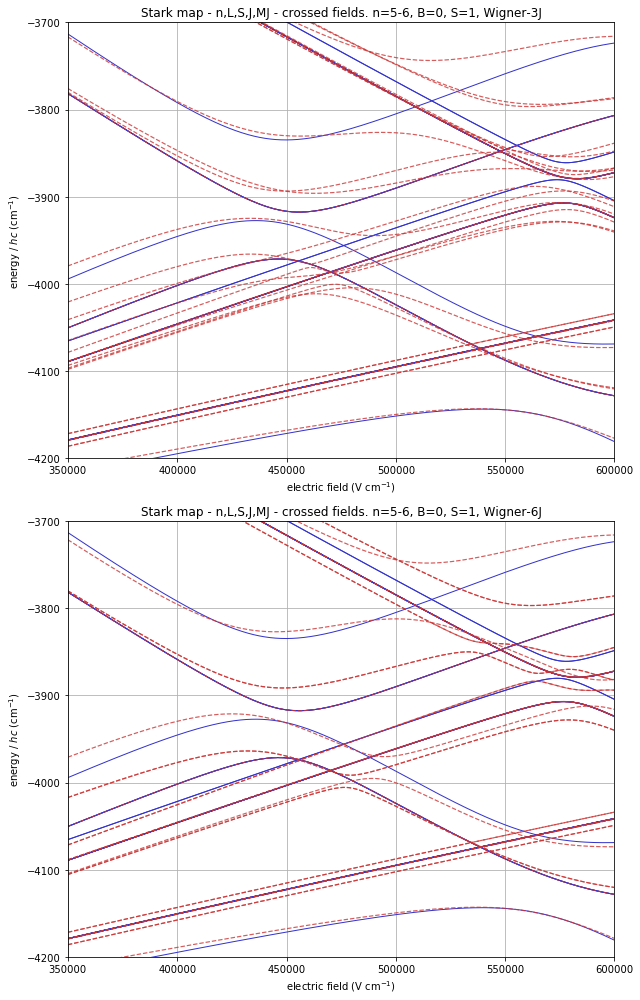

In [7]:
plt.figure(figsize=(9, 14))
plt.subplot(2,1,1)

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = [i for i, state in enumerate(mat0.basis) if state.L==state.J]
#indexes = mat0.where('J', 11)
for ix in indexes:
    plt.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    plt.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h c$ (cm$^{-1}$)')
plt.xlim(350000, 600000)
plt.ylim(-4200, -3700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ - crossed fields. n=5-6, B=0, S=1, Wigner-3J')
plt.tight_layout()

plt.subplot(2,1,2)

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = [i for i, state in enumerate(mat0.basis) if state.L==state.J]
#indexes = mat0.where('J', 11)
for ix in indexes:
    plt.plot(Efield, sm2[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#
indexes = range(mat1.num_states)
for ix in indexes:
    plt.plot(Efield, sm3[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h c$ (cm$^{-1}$)')
plt.xlim(350000, 600000)
plt.ylim(-4200, -3700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ - crossed fields. n=5-6, B=0, S=1, Wigner-6J')
plt.tight_layout()

# Testing 

In [ ]:
from sympy.physics.wigner import wigner_3j, clebsch_gordan

In [ ]:
state_1_L, ML_1 = 1, 1
state_2_L, ML_2 = 2, 0
q = -1
wigner_3j(state_2_L, 1, state_1_L, -ML_2, q, ML_1)

In [ ]:
q_arr   = [[0],
           [1, -1]]
tau_arr = [[1],
           [(1./2)**0.5, (1./2)**0.5]]

ol_para = []
ol_perp = []

states = Hamiltonian(n_min=3, n_max=3, S=0, MJ=None)
for state_1 in states.basis:
    for state_2 in states.basis:
        delta_L = state_1.L - state_2.L
        if abs(delta_L) == 1:
            MS = [np.arange(-state_1.S, state_1.S + 1),
                  np.arange(-state_2.S, state_2.S + 1)]
            ML = [state_1.MJ - MS[0],
                  state_2.MJ - MS[1]]
            tmp = []
            for ML_1 in ML[0]:
                for ML_2 in ML[1]:
                    ang_ol_para = []
                    ang_ol_perp = []

                    #ang_tmp = []
                    #for q, tau in zip(q_arr[0], tau_arr[0]):
                    #    ang_tmp.append(tau * float(wigner_3j(state_2_L, 1, state_1_L, -ML_2, q, ML_1)))
                    
                    ang_tmp = []
                    for q, tau in zip(q_arr[1], tau_arr[1]):
                        ang_tmp.append(tau * float(wigner_3j(state_2.L, 1, state_1.L, -ML_2, q, ML_1)))
                
                    ang_overlap_stark = ((2*state_2.L+1)*(2*state_1.L+1))**0.5 * \
                        np.sum(ang_tmp) * \
                        wigner_3j(state_2.L, 1, state_1.L, 0, 0, 0)
                    tmp.append(float(clebsch_gordan(state_1.L, state_1.S, state_1.J,
                                ML_1, state_1.MJ - ML_1, -state_1.MJ)) * \
                               float(clebsch_gordan(state_2.L, state_2.S, state_2.J,
                                ML_2, state_2.MJ - ML_2, -state_2.MJ)) * \
                               ang_overlap_stark)
                    #print('tmp[-1]:', tmp[-1])
                    print('n,L,S,J,MJ')
                    print('state 1:', state_1, ' ML:', ML_1)
                    print('state 2:', state_2, ' ML:', ML_2)
                    print(float(clebsch_gordan(state_1.L, state_1.S, state_1.J,
                                ML_1, state_1.MJ - ML_1, -state_1.MJ)), 
                          float(clebsch_gordan(state_2.L, state_2.S, state_2.J,
                                ML_2, state_2.MJ - ML_2, -state_2.MJ)),
                         ang_overlap_stark)
                    print('----')
                    
            ol_perp.append(np.sum(tmp))
#print(np.sum(ang_ol_para))
print(np.sum(ol_perp))

In [ ]:
state_1_L, state_1_S, state_1_J = 2,0,2
ML_1, state_1_MJ = 1,1
float(wigner_3j(state_1_L, state_1_S, state_1_J,
                     ML_1, state_1_MJ - ML_1, state_1_MJ))

In [ ]:
float(clebsch_gordan(2, 2, 0,
                     1, -1, 0))

In [7]:
from sympy.physics.wigner import wigner_3j, wigner_6j, clebsch_gordan

## Test Wigner-3J and Wigner-6J

In [8]:
Efield_vec = [0.0, 0.0, 1.0]
#Efield_vec = [1.0, 0.0, 0.0]
if Efield_vec == [0.0,0.0,1.0]: # parallel fields
    field_orientation = 'parallel'
    q_arr   = [0]
    tau_arr = [1.]
elif Efield_vec[2] == 0.0: # perpendicular fields
    field_orientation = 'perpendicular'
    q_arr   = [1,-1]
    tau_arr = [(1./2)**0.5, -(1./2)**0.5]

states = Hamiltonian(n_min=5, n_max=6, S=0, MJ=None)
for state_1 in states.basis:
    for state_2 in states.basis:
        delta_L = state_1.L - state_2.L
        delta_S = state_1.S - state_2.S
        delta_MJ = state_1.MJ - state_2.MJ  
        
        print('---', state_1, '---', state_2, '---')
        
        # Wigner-3J
        if abs(delta_L) == 1 and delta_S == 0 and \
         ((field_orientation=='parallel'      and     delta_MJ  == 0) or \
          (field_orientation=='perpendicular' and abs(delta_MJ) == 1)):
            # For accumulating each element in the ML sum
            sum_ML = []
            # Loop through all combination of ML for each state
            for MS_1 in np.arange(-state_1.S, state_1.S + 1):
                for MS_2 in np.arange(-state_2.S, state_2.S + 1):
                    delta_MS = MS_1 - MS_2
                    # Change in projection of spin:  0, +/- 1
                    if ((field_orientation=='parallel'      and     delta_MS  in [0,1]) or \
                        (field_orientation=='perpendicular' and abs(delta_MS) in [0,1])):
                        ML_1 = state_1.MJ - MS_1
                        ML_2 = state_2.MJ - MS_2
                        # For accumulating each element in the angular component, q sum
                        sum_q = []
                        for q, tau in zip(q_arr, tau_arr):
                            sum_q.append(tau * float(wigner_3j(state_2.L, 1, state_1.L, -ML_2, q, ML_1)))
                        # Calculate the angular overlap term using Wigner-3J symbols
                        ang_overlap_stark = ((2*state_2.L+1)*(2*state_1.L+1))**0.5 * \
                                              np.sum(sum_q) * \
                                              wigner_3j(state_2.L, 1, state_1.L, 0, 0, 0)
                        if ang_overlap_stark != 0.0:
                            sum_ML.append(float(clebsch_gordan(state_1.L, state_1.S, state_1.J,
                                          ML_1, state_1.MJ - ML_1, state_1.MJ)) * \
                                          float(clebsch_gordan(state_2.L, state_2.S, state_2.J,
                                          ML_2, state_2.MJ - ML_2, state_2.MJ)) * \
                                          ang_overlap_stark)
            if np.sum(sum_ML) != 0:
                print('Wigner-3J: ', float(np.sum(sum_ML)))
                            
        # Wigner-6J
        if abs(delta_L) == 1 and delta_S == 0:
            S = state_1.S
            sum_q = []
            for q, tau in zip(q_arr, tau_arr):
                sum_q.append( (-1.)**(int(state_1.J - state_1.MJ)) * \
                            wigner_3j(state_1.J, 1, state_2.J, -state_1.MJ, -q, state_2.MJ) * \
                            (-1.)**(int(state_1.L + S + state_2.J + 1.)) * \
                            np.sqrt((2.*state_1.J+1.) * (2.*state_2.J+1.)) * \
                            wigner_6j(state_1.J, 1., state_2.J, state_2.L, S, state_1.L) * \
                            (-1.)**state_1.L * np.sqrt((2.*state_1.L+1.) * (2.*state_2.L+1.)) * \
                            wigner_3j(state_1.L, 1, state_2.L, 0, 0, 0) * tau)
            if np.sum(sum_q) != 0:
                print('Wigner-6J: ', float(np.sum(sum_q)))

--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 0 0 0 0 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 2 0 2 -2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 2 0 2 -1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 2 0 2 0 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 2 0 2 1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 2 0 2 2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 -3 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 -2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 -1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 0 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 3 0 3 3 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 -4 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 -3 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 -2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 -1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 0 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 2 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 3 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 4 0 4 4 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 1 0 1 -1 ⟩ ---
--- ❘ 5 0 0 0 0 ⟩ --- ❘ 5 1 0 1 0 ⟩ ---
Wigner-3J:  0.5773502691896256

--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 2 0 2 -1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 2 0 2 0 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 2 0 2 1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 2 0 2 2 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 -3 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 -2 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 -1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 0 ⟩ ---
Wigner-3J:  0.50709255283711
Wigner-6J:  0.50709255283711
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 2 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 3 0 3 3 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 5 2 0 2 0 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 5 2 0

--- ❘ 5 3 0 3 -1 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
--- ❘ 5 3 0 3 -1 ⟩ --- ❘ 6 5 0 5 5 ⟩ ---
--- ❘ 5 3 0 3 -1 ⟩ --- ❘ 6 1 0 1 -1 ⟩ ---
--- ❘ 5 3 0 3 -1 ⟩ --- ❘ 6 1 0 1 0 ⟩ ---
--- ❘ 5 3 0 3 -1 ⟩ --- ❘ 6 1 0 1 1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 0 0 0 0 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 2 0 2 -2 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 2 0 2 -1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 2 0 2 0 ⟩ ---
Wigner-3J:  0.50709255283711
Wigner-6J:  0.50709255283711
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 2 0 2 1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 2 0 2 2 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 -3 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 -2 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 -1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 0 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 2 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 3 0 3 3 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 4 0 4 -4 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 4 0 4 -3 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 4 0 4 -2 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 4 0 4 -1 ⟩ ---
--- ❘ 5 3 0 3 0 ⟩ --- ❘ 5 4 0 4 0 ⟩ ---
Wigner-

--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 2 0 2 1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 2 0 2 2 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 -3 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 -2 ⟩ ---
Wigner-3J:  0.4364357804719848
Wigner-6J:  0.43643578047198467
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 -1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 0 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 2 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 3 0 3 3 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 -4 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 -3 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 -2 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 -1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 0 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 2 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 3 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 4 0 4 4 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 1 0 1 -1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 1 0 1 0 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 5 1 0 1 1 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 6 0 0 0 0 ⟩ ---
--- ❘ 5 4 0 4 -2 ⟩ --- ❘ 6 

--- ❘ 5 4 0 4 2 ⟩ --- ❘ 5 4 0 4 4 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 5 1 0 1 -1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 5 1 0 1 0 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 5 1 0 1 1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 0 0 0 0 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 2 0 2 -2 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 2 0 2 -1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 2 0 2 0 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 2 0 2 1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 2 0 2 2 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 -3 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 -2 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 -1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 0 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 2 ⟩ ---
Wigner-3J:  0.4364357804719848
Wigner-6J:  0.43643578047198467
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 3 0 3 3 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 5 4 0 4 2 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 5

--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 -2 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 -1 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 0 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 1 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 2 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 3 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 5 0 5 5 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 1 0 1 -1 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 1 0 1 0 ⟩ ---
--- ❘ 5 1 0 1 1 ⟩ --- ❘ 6 1 0 1 1 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 0 0 0 0 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 2 0 2 -2 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 2 0 2 -1 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 2 0 2 0 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 2 0 2 1 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 2 0 2 2 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 3 0 3 -3 ⟩ ---
--- ❘ 6 0 0 0 0 ⟩ --- ❘ 5 3 0 3

--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 0 0 0 0 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 2 0 2 -2 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 2 0 2 -1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 2 0 2 0 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 2 0 2 1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 2 0 2 2 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 -3 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 -2 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 -1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 0 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 2 ⟩ ---
Wigner-3J:  0.3779644730092272
Wigner-6J:  0.3779644730092272
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 3 0 3 3 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 -4 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 -3 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 -2 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 -1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 0 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 1 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 2 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 3 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 4 0 4 4 ⟩ ---
--- ❘ 6 2 0 2 2 ⟩ --- ❘ 5 1 0 1 -1 ⟩ ---
--- ❘ 6 

--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 3 0 3 0 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 3 0 3 1 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 3 0 3 2 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 3 0 3 3 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
Wigner-3J:  -0.4879500364742666
Wigner-6J:  0.4879500364742665
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 -2 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 -1 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 0 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 1 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 2 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 3 ⟩ ---
--- ❘ 6 3 0 3 1 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
--- ❘ 6 

--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 -2 ⟩ ---
Wigner-3J:  0.46056618647183833
Wigner-6J:  0.4605661864718383
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 -1 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 0 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 1 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 2 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 3 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 5 0 5 5 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 1 0 1 -1 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 6 1 0 1 0 ⟩ ---
--- ❘ 6 4 0 4 -2 ⟩ --- ❘ 

--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 -2 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 -1 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 0 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 1 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 2 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 3 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
Wigner-3J:  0.30151134457776363
Wigner-6J:  0.3015113445777635
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 5 0 5 5 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 1 0 1 -1 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 1 0 1 0 ⟩ ---
--- ❘ 6 4 0 4 4 ⟩ --- ❘ 6 1 0 1 1 ⟩ ---
--- ❘ 6

--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 3 0 3 2 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 3 0 3 3 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
Wigner-3J:  0.502518907629606
Wigner-6J:  0.502518907629606
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 3 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 4 0 4 4 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 -5 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 -4 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 -3 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 -2 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 -1 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 0 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 1 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 2 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 3 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 4 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 5 0 5 5 ⟩ ---
--- ❘ 6 5 0 5 0 ⟩ --- ❘ 6 1 0 1 -1 ⟩ ---
--- ❘ 6 5 

--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 5 1 0 1 0 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 5 1 0 1 1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 0 0 0 0 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 2 0 2 -2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 2 0 2 -1 ⟩ ---
Wigner-3J:  -0.447213595499958
Wigner-6J:  0.4472135954999578
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 2 0 2 0 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 2 0 2 1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 2 0 2 2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 -3 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 -2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 -1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 0 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 3 0 3 3 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 -4 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 -3 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 -2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 -1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 0 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 1 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 4 0 4 2 ⟩ ---
--- ❘ 6 1 0 1 -1 ⟩ --- ❘ 6 